In [1]:
!pip install requests matplotlib

In [2]:
import requests
import time

# Storage for ISS data
timestamps = []
latitudes = []
longitudes = []

# Collect 100 data points every 10 seconds
for i in range(100):
    response = requests.get("http://api.open-notify.org/iss-now.json")
    if response.status_code == 200:
        data = response.json()
        position = data['iss_position']
        timestamps.append(data['timestamp'])
        latitudes.append(float(position['latitude']))
        longitudes.append(float(position['longitude']))
    else:
        print("Failed to retrieve data.")
    
    time.sleep(10)  # Wait 10 seconds between each request


In [3]:
import pandas as pd

# Save
df = pd.DataFrame({'timestamp': timestamps, 'latitude': latitudes, 'longitude': longitudes})
df.to_csv("iss_data.csv", index=False)


Matplotlib is building the font cache; this may take a moment.


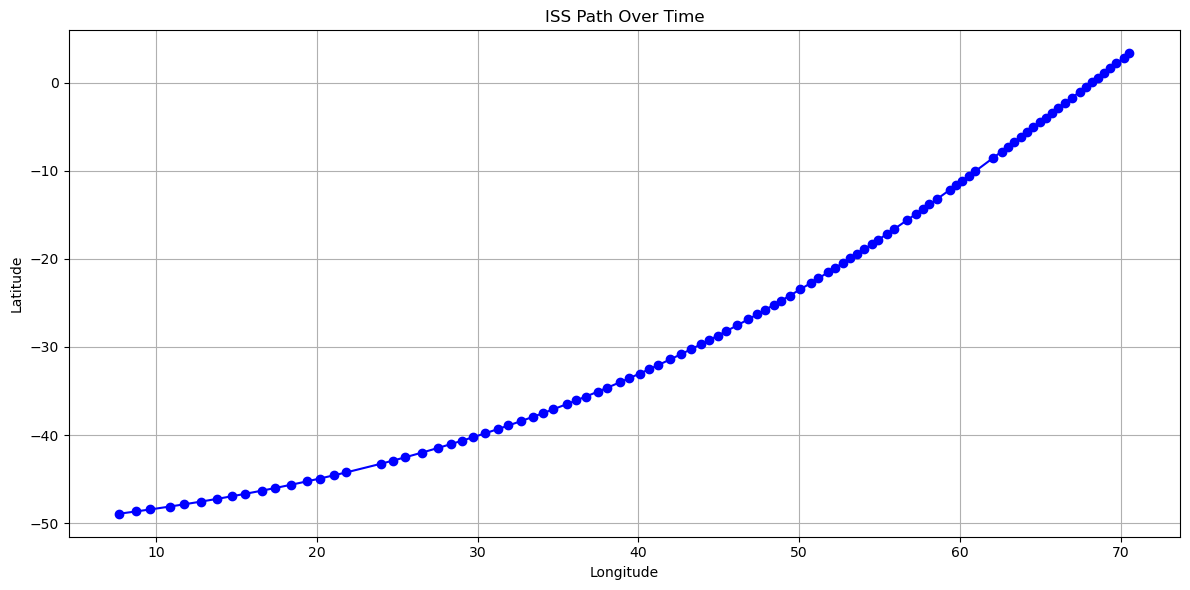

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(longitudes, latitudes, marker='o', linestyle='-', color='blue')
plt.title("ISS Path Over Time")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.tight_layout()
plt.show()

Text(70.5257, 3.3127, 'End')

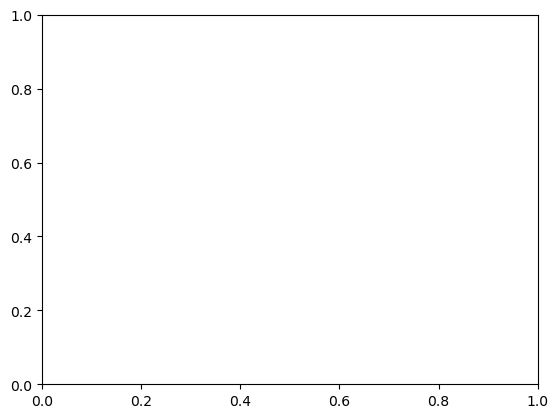

In [5]:
plt.annotate('Start', (longitudes[0], latitudes[0]), color='green')
plt.annotate('End', (longitudes[-1], latitudes[-1]), color='red')